In [1]:
# Imports needed for the script
import numpy as np
import pandas as pd
import re
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [2]:
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv', index_col = 0)

In [3]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

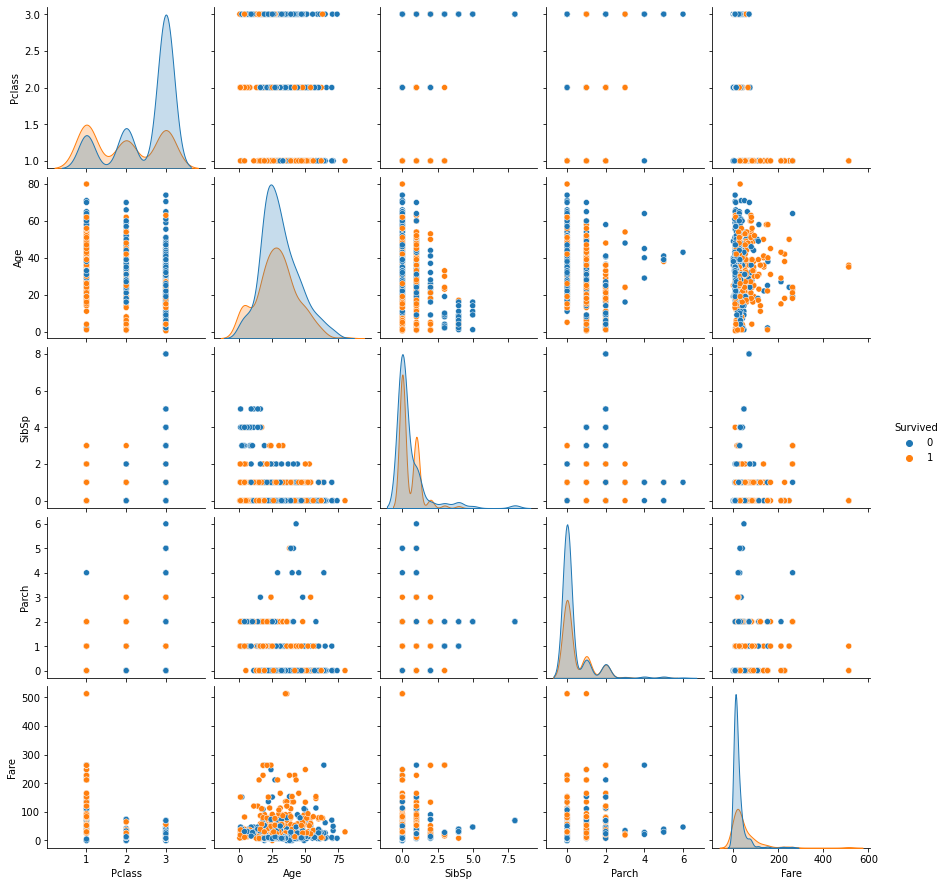

In [5]:
sns.pairplot(train_df, diag_kind = 'kde', hue = 'Survived' )

In [6]:
corr = train_df.corr()

In [7]:
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

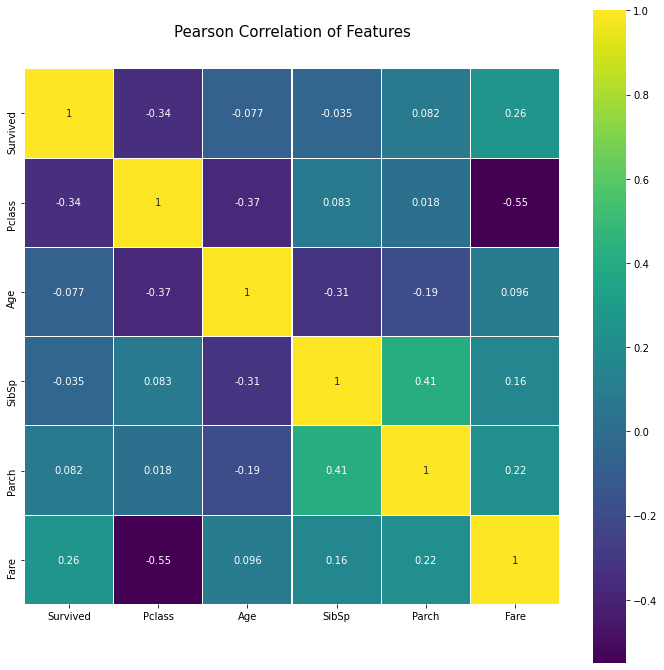

In [9]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [10]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train_df.Survived.mean()

0.3838383838383838

In [12]:
df = train_df.loc[:,['Survived', 'Age']]

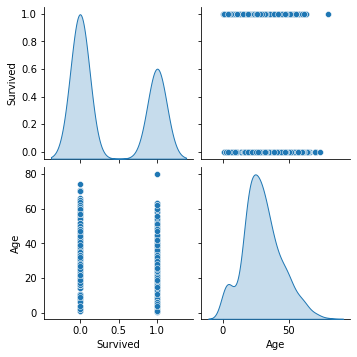

In [13]:
sns.pairplot(train_df.loc[:,['Survived', 'Age']], diag_kind = 'kde')

# Decision Tree
- Link - https://towardsdatascience.com/decision-trees-for-dummies-37dbee6c7169

##  Advantages of decision Tree
1. Simple to Understand, Interpret and Visualize
2. Little effor is required for data preparation - scaling is not needed
3. Handle both numerical and categorical data
4. Non Linear parameters don't effect the performance

# Disadvantages of Decision Tree
1. Overfitting -  Overfitting occurs when the algorithm captures noise in the data
2. High Variance - The model can get unstable due to small variation in the data


## Before we jump into decision trees, let’s first understand the anatomy of a tree in the context of data science (See the tree in the figure below).
1. A tree has Nodes and Branches.
2. Branches connect nodes.
3. There is a parent child relationship between the nodes connected with a branch. (Node C is the child of Node A)
4. Depth of a node is defined as the number of branches from the node to the root node (Depth of node G is 2).
5. A node which has no child is called leaf node. (Nodes E, F, G and D are leaf nodes)

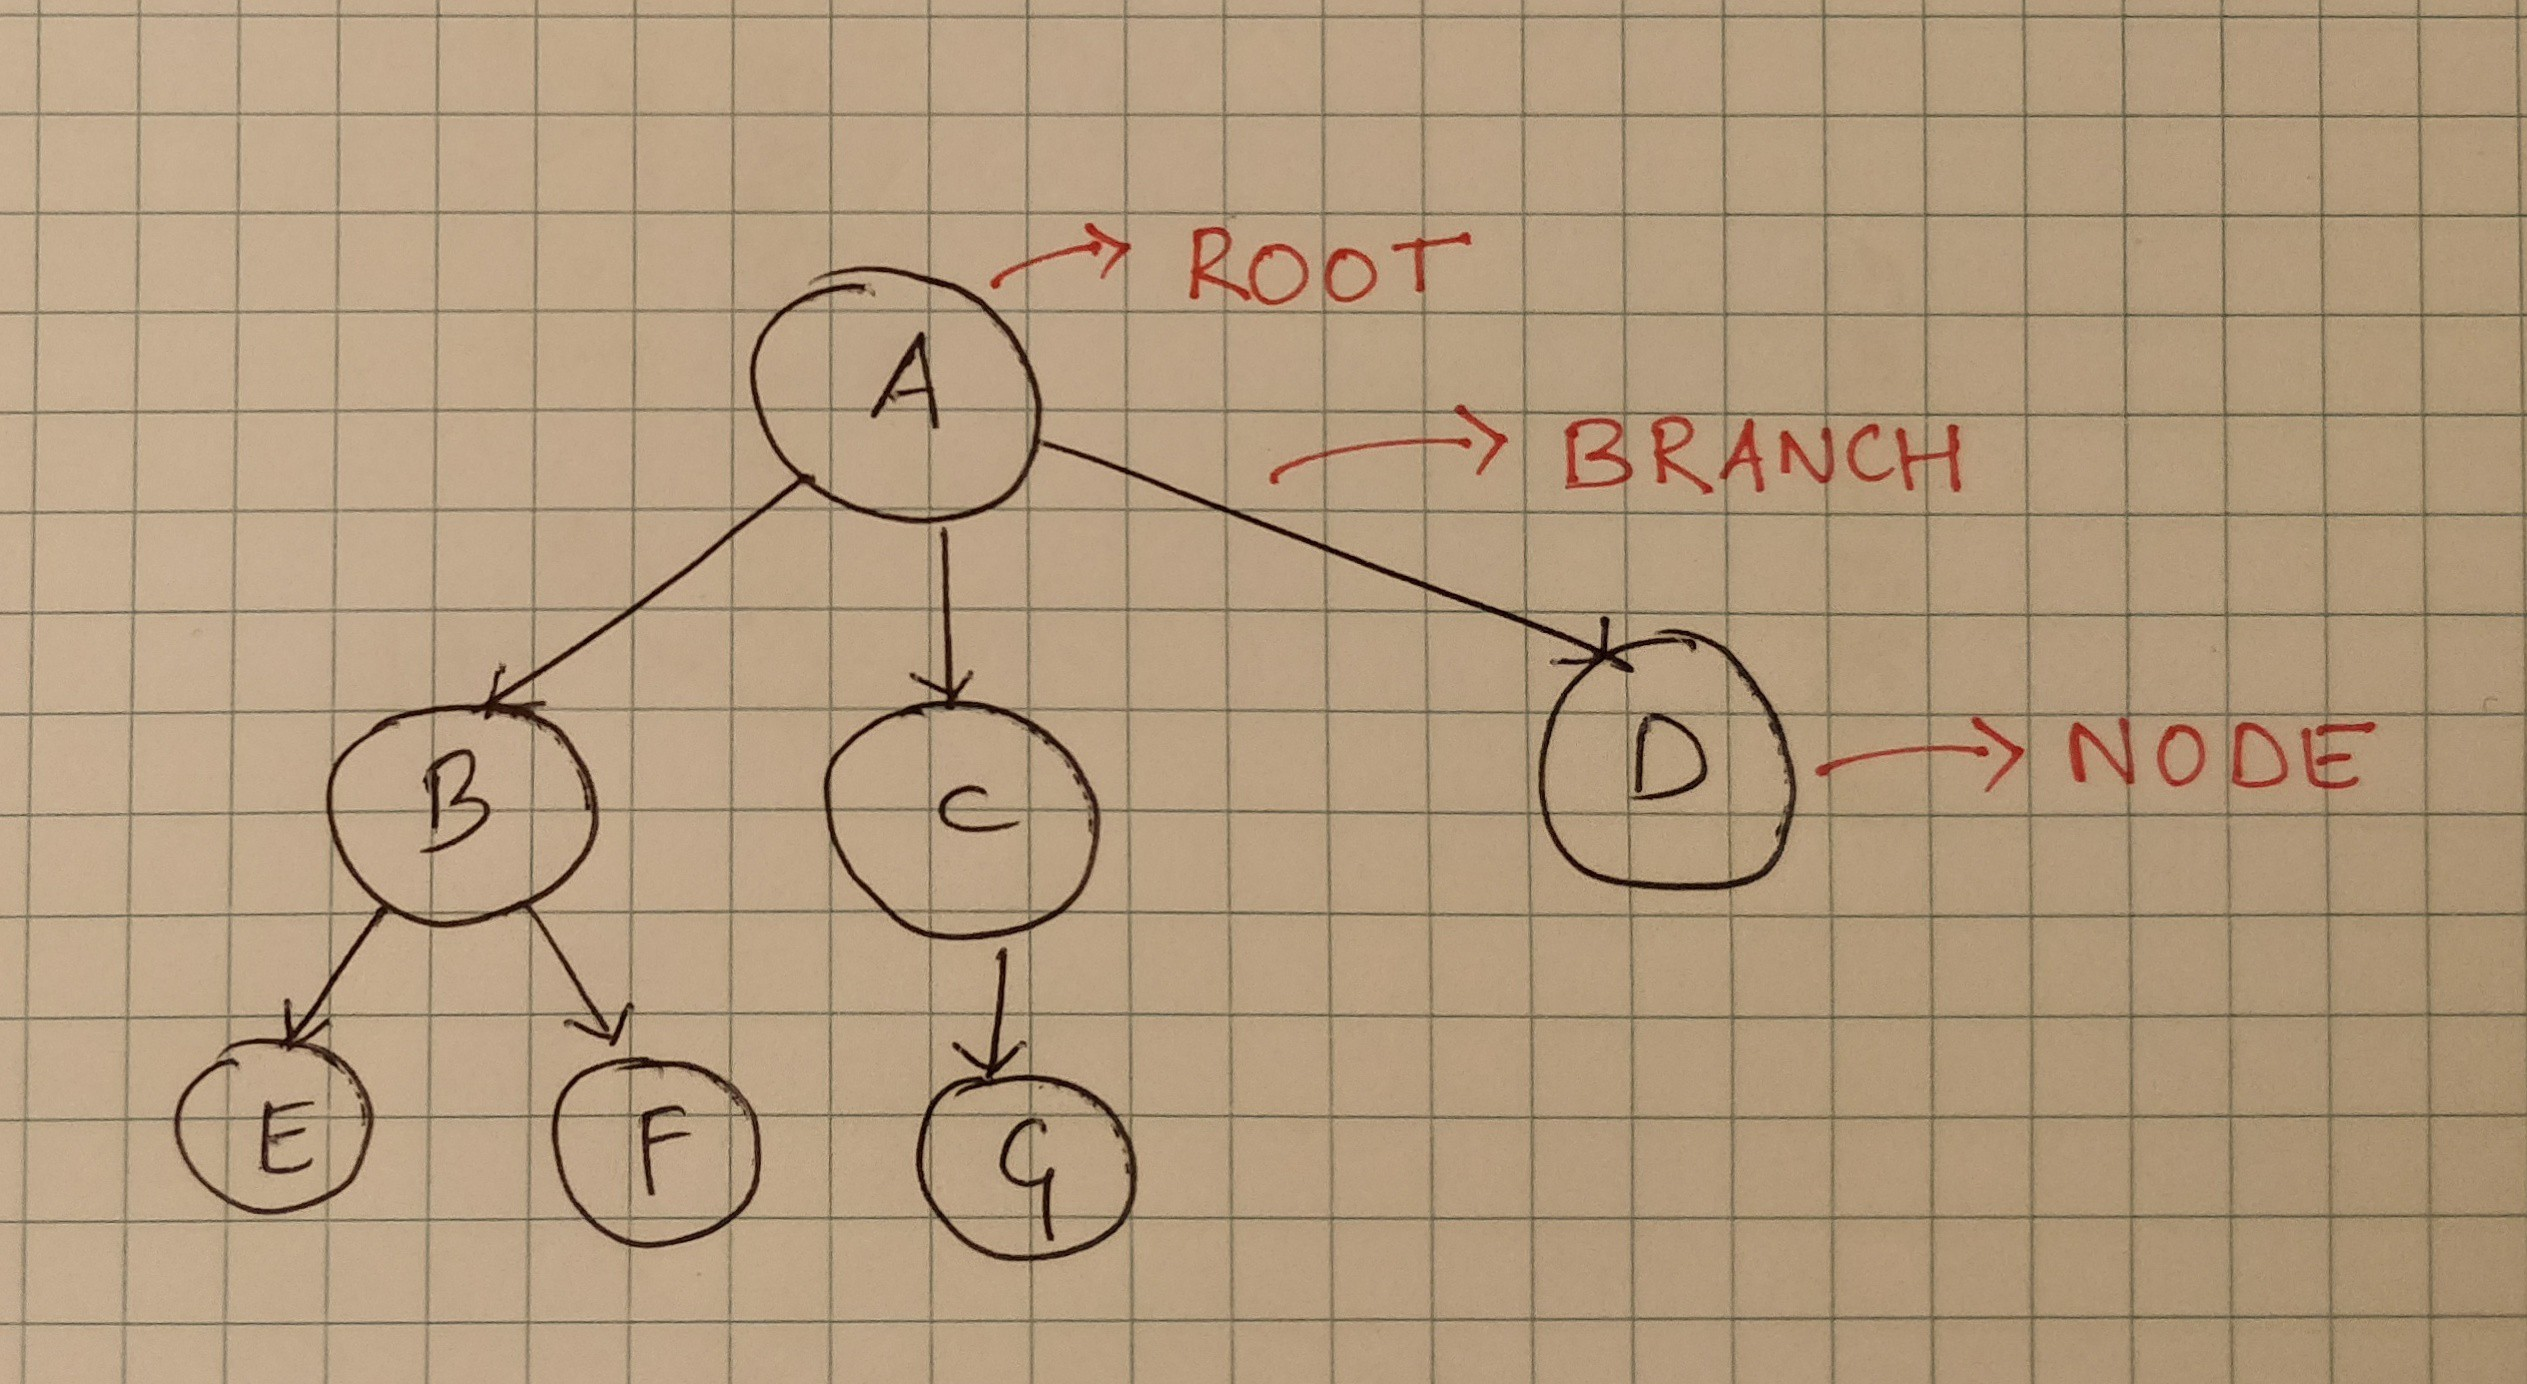

In [14]:
from IPython.display import Image
Image("/Users/rahulgarg/github/AnalyticsCourse/images/1_l7yMcYvD5UXvgXqbrxWCSw.jpeg")

# Now How do we split the data ? - we shall split the data in such a way that the information gain is the highest

# Entropy
1. Entropy is the measure of randomness in the target variable. 

# Information Gain
1. it is the measure of decrease in entropy after the dataset is split.

# Formula for Entropy is 

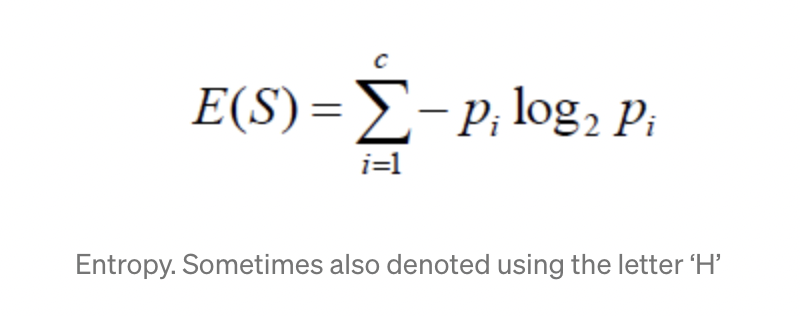

In [15]:
Image("/Users/rahulgarg/Documents/Screenshot 2021-06-01 at 12.48.26 AM.png")

In [16]:
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv', index_col = 0)

In [17]:
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [18]:
train_df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

If I was to calculate the entropy of my classes in this example using the formula above. Here’s what I would get.

In [19]:
train_df.shape

(891, 11)

In [20]:
import math

In [21]:
-549/891*math.log2(549/891) - 342/891*math.log2(342/891)

0.9607079018756469

This is considered a high entropy , a high level of disorder ( meaning low level of purity). Entropy is measured between 0 and 1.(Depending on the number of classes in your dataset, entropy can be greater than 1 but it means the same thing , a very high level of disorder.

Logarithm of fractions gives a negative value and hence a ‘-‘ sign is used in entropy formula to negate these negative values. The maximum value for entropy depends on the number of classes.
- 2 classes: Max entropy is 1
- 4 Classes: Max entropy is 2
- 8 Classes: Max entropy is 3
- 16 classes: Max entropy is 4

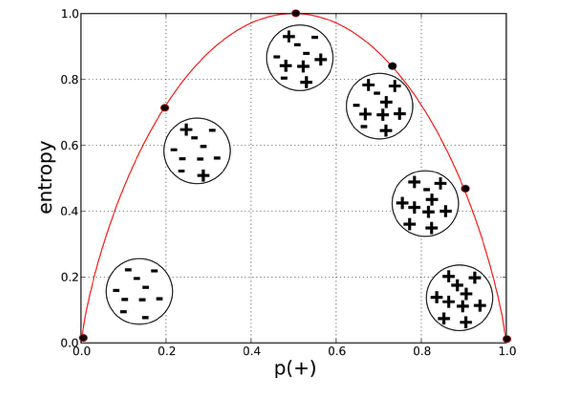

In [22]:
Image("/Users/rahulgarg/github/AnalyticsCourse/images/1_M15RZMSk8nGEyOnD8haF-A.png")

It’s just a metric. It’s not important to know how it came to be. It’s important to know how to read it and what it tells us, which we just did above. Entropy is a measure of disorder or uncertainty and the goal of machine learning models and Data Scientists in general is to reduce uncertainty.

Now we know how to measure disorder. Next we need a metric to measure the reduction of this disorder in our target variable/class given additional information( features/independent variables) about it. This is where Information Gain comes in. Mathematically it can be written as:

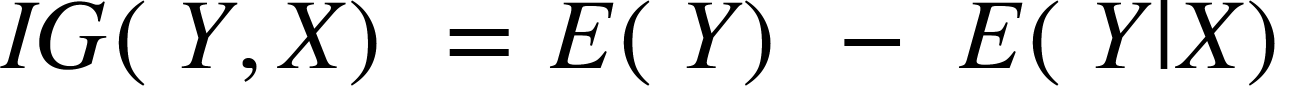

In [23]:
Image("/Users/rahulgarg/github/AnalyticsCourse/images/0_08CaHVjPCgs_fZyp.png")

We simply subtract the entropy of Y given X from the entropy of just Y to calculate the reduction of uncertainty about Y given an additional piece of information X about Y. This is called Information Gain. The greater the reduction in this uncertainty, the more information is gained about Y from X.

In [24]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
# Entropy of Survived 
-549/891*math.log2(549/891) - 342/891*math.log2(342/891)

0.9607079018756469

In [26]:
train_df.groupby(['Sex', 'Survived']).agg({'Name':'count'})

Name
Sex    Survived      
female 0           81
       1          233
male   0          468
       1          109

In [27]:
# Entropy of Survived given Gender

In [28]:
# 1. Entropy of Survived given Female

In [29]:
-81/342*math.log2(81/342) - 233/342*math.log2(233/342)

0.8693639407487428

In [30]:
# 1. Entropy of Survived given Male

In [31]:
-468/549*math.log2(468/549) - 109/549*math.log2(109/549)

0.6594160099094378

In [32]:
# Weighted Average - # Entropy of Survived given Gender

In [33]:
342/891*0.869 + 549/891*0.659

0.7396060606060606

In [34]:
# Therefore Information Gain
0.960 - 0.739

0.22099999999999997

# IG for Pclass

In [35]:
train_df.groupby(['Pclass', 'Survived']).agg({'Name':'count'})

Name
Pclass Survived      
1      0           80
       1          136
2      0           97
       1           87
3      0          372
       1          119

In [36]:
train_df.groupby(['Pclass', 'Survived']).agg({'Name':'count'}).unstack(1).sum(axis =1)

Pclass
1    216
2    184
3    491
dtype: int64

In [37]:
# E survived given pcalss 1
-80/216*math.log2(80/216) - 136/216*math.log2(136/216)

0.9509560484549725

In [38]:
# E survived given pcalss 2
-97/184*math.log2(97/184) - 87/184*math.log2(87/184)

0.9978683156711936

In [39]:
# E survived given pcalss 3
-372/491*math.log2(372/491) - 119/491*math.log2(119/491)

0.7989470522661535

In [40]:
# E surviced given p class
216/891*0.950 +184/891*0.997 + 491/891*0.798

0.8759438832772166

In [41]:
# Therefore Information Gain
0.960 - 0.8859

0.07409999999999994

In [42]:
train_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/train.csv')
test_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/test.csv')

In [43]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [44]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [45]:
train_df['Fare'].mean()

32.2042079685746

In [46]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [47]:
# Impute Missing Values
train_df['Age'] = train_df.Age.fillna(28.0)

train_df['Fare'] = train_df['Fare'].astype(int)

train_df['Embarked'] = train_df.Embarked.fillna('S')

In [48]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S


In [49]:
# # Create Dummy Columns
# from sklearn import preprocessing #import
# le = preprocessing.LabelEncoder() #instantiate
# le.fit(train_df.Sex) #Fit

# train_df['gender_male'] =le.transform(train_df.Sex)
# train_embarked_encoded =  pd.get_dummies(train_df.Embarked, drop_first = True,  prefix='Embarked')

# test_df['gender_male'] =le.transform(test_df.Sex)
# test_embarked_encoded =  pd.get_dummies(test_df.Embarked, drop_first = True,  prefix='Embarked')

In [50]:
# # Store our test passenger IDs for easy access
# PassengerId = test_df['PassengerId']

In [51]:
# train = pd.concat([train_df, train_embarked_encoded], axis =1)
# test = pd.concat([test_df, test_embarked_encoded], axis =1)

In [52]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_gender = preprocessing.LabelEncoder() #instantiate
le_gender.fit(train_df.Sex) #Fit

LabelEncoder()

In [53]:
train_df['gender_encoded'] =le_gender.transform(train_df.Sex)

In [54]:
# Create Dummy Columns
from sklearn import preprocessing #import
le_embarked = preprocessing.LabelEncoder() #instantiate
le_embarked.fit(train_df.Embarked) #Fit

LabelEncoder()

In [55]:
train_df['embarked_encoded'] =le_embarked.transform(train_df.Embarked)

In [56]:
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_encoded,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,1,2
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8,NaN,Q,1,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51,E46,S,1,2
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21,NaN,S,1,2
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11,NaN,S,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30,NaN,C,0,0


In [57]:
X = pd.DataFrame(train_df.loc[:,['Pclass','Age','Parch','Fare','gender_encoded','embarked_encoded' ]])
y = train_df.Survived # Step 0

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier #Import

In [59]:
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state = 0) #instantiate

In [61]:
clf_entropy.fit(X,y) # Fit

predicted_survived = pd.Series(clf_entropy.predict(X)) #predict
predicted_survived

In [62]:
clf_entropy.score(X,y)

0.9607182940516273

In [65]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(train_df.Survived, predicted_survived)

pd.DataFrame(cm,columns =  ['Predicted_0','Predicted_1'], index = ['Survived_0','Survived_1'])

In [66]:
accuracy_score(train_df.Survived, predicted_survived)

0.9607182940516273

In [67]:
from sklearn.metrics import f1_score
f1_score(train_df.Survived, predicted_survived)

0.9465648854961832

## Visualise Decision tree

In [68]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image  
import pydotplus

In [87]:
dot_data = StringIO()
export_graphviz(clf_entropy, out_file=dot_data,  max_depth = 3 ,
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

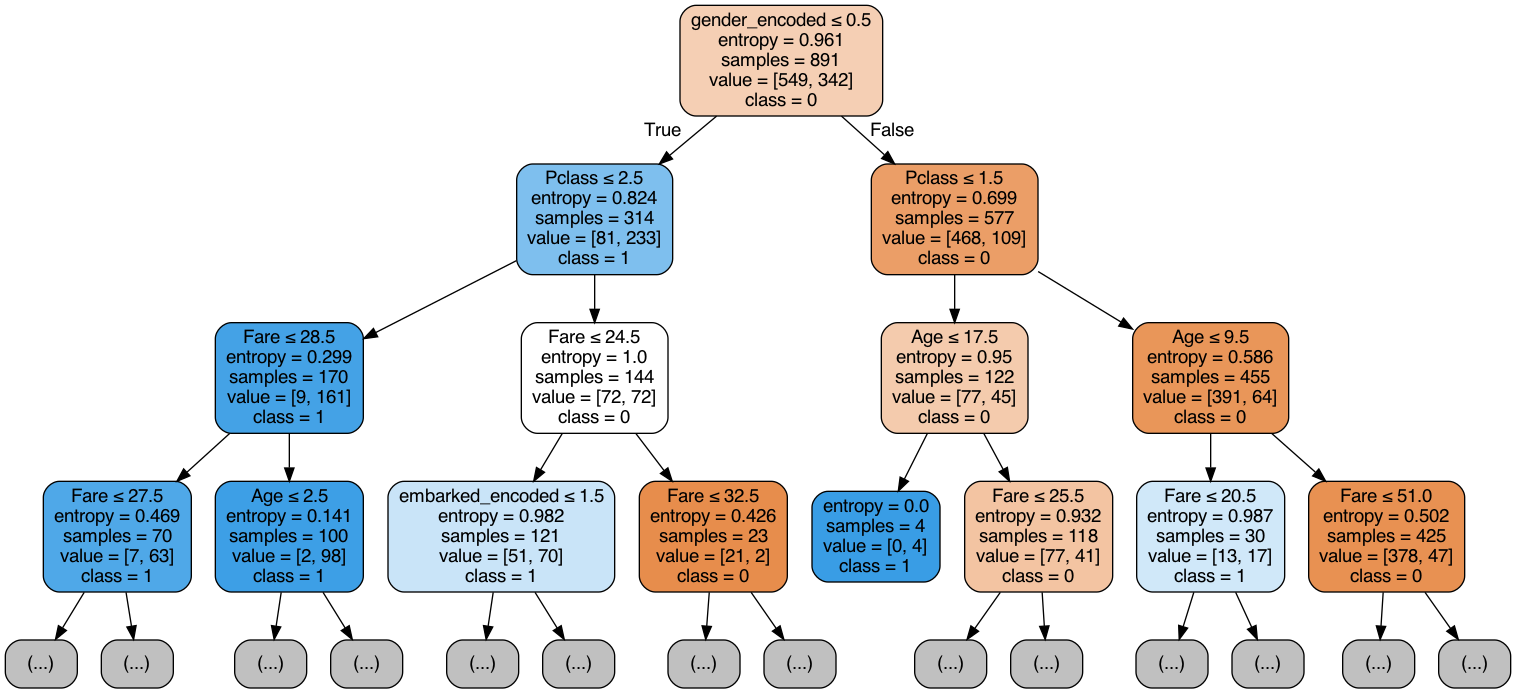

In [88]:
graph.write_png('tree1.png')
Image(graph.create_png())

# Visualisation Type 2

In [89]:
list(X)

['Pclass', 'Age', 'Parch', 'Fare', 'gender_encoded', 'embarked_encoded']

In [90]:
FEATURE_NAMES = list(X)

In [91]:
from sklearn.tree import export_graphviz
export_graphviz(clf_entropy, 'tree2.dot', feature_names = X.columns, max_depth = 3)

In [92]:
! dot -Tpng tree2.dot -o tree2.png

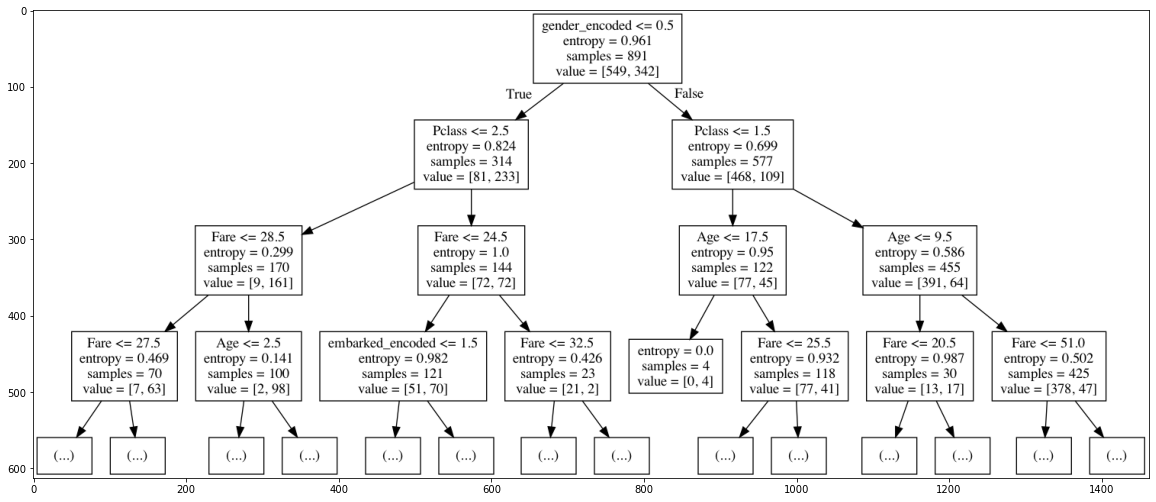

In [93]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline
img = cv2.imread('tree2.png')
plt.figure(figsize = (20, 20))
plt.imshow(img)

## predictions on test set

In [76]:
test_df = pd.read_csv('/Users/rahulgarg/github/AnalyticsCourse/datasets/titanic/test.csv', index_col = 0)
test_df['Age'] = test_df.Age.fillna(28.0)
test_df['Fare'] = test_df['Fare'].fillna(31).astype(int)
test_df['Embarked'] = test_df.Embarked.fillna('S')


In [77]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12,NaN,S
...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7,NaN,S


In [78]:
test_df['gender_encoded'] =le_gender.transform(test_df.Sex)

In [79]:
test_df['embarked_encoded'] =le_embarked.transform(test_df.Embarked)

In [80]:
test_df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_encoded,embarked_encoded
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,NaN,Q,1,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S,0,2
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9,NaN,Q,1,1
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8,NaN,S,1,2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12,NaN,S,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,28.0,0,0,A.5. 3236,8,NaN,S,1,2
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108,C105,C,0,0
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7,NaN,S,1,2


In [81]:
X_test = pd.DataFrame(test_df.loc[:,['Pclass','Age','Parch','Fare','gender_encoded','embarked_encoded' ]])
# y = test_df.Survived # Step 0

In [82]:
test_preds = clf_entropy.predict(X_test) #predict

In [83]:
test_preds

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
submission_df = pd.DataFrame(test_preds, index= test_df.index, columns = ['Survived'])

In [85]:
submission_df

,Survived
PassengerId,
892,0
893,0
894,1
895,1
896,1
...,...
1305,0
1306,1
1307,0


In [94]:
submission_df.to_csv('/Users/rahulgarg/github/AnalyticsCourse/kaggle_submissions/titanic_submission_5.csv')

# Train Test Split

In [106]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_encoded,embarked_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,NaN,S,1,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C85,C,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,NaN,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,C123,S,0,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,NaN,S,1,2


In [103]:
train_df.shape

(891, 14)

In [97]:
test_df.head(2)

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,gender_encoded,embarked_encoded
PassengerId,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7,NaN,Q,1,1
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7,NaN,S,0,2


In [104]:
test_df.shape

(418, 12)

In [100]:
X

,Pclass,Age,Parch,Fare,gender_encoded,embarked_encoded
0,3,22.0,0,7,1,2
1,1,38.0,0,71,0,0
2,3,26.0,0,7,0,2
3,1,35.0,0,53,0,2
4,3,35.0,0,8,1,2
...,...,...,...,...,...,...
886,2,27.0,0,13,1,2
887,1,19.0,0,30,0,2
888,3,28.0,2,23,0,2
889,1,26.0,0,30,1,0


In [99]:
from sklearn.model_selection import train_test_split

In [101]:
X.shape

(891, 6)

In [102]:
y.shape

(891,)

In [119]:
# Step 0
X_train, X_valid, y_train, y_valid = train_test_split( X, y, test_size=0.33, random_state=20)

In [124]:
from sklearn.tree import DecisionTreeClassifier #Import
clf_entropy2 = DecisionTreeClassifier(criterion='entropy', random_state = 0) #instantiate
clf_entropy2.fit(X_train,y_train) # Fit

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [128]:
clf_entropy2.score(X_train,y_train)

0.9697986577181208

In [127]:
clf_entropy2.score(X_valid,y_valid)

0.7627118644067796

In [129]:
y_pred = clf_entropy2.predict(X_valid)

In [130]:
from sklearn.metrics import f1_score
f1_score(y_valid, y_pred)

0.6788990825688074

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_valid, predicted_survived)

pd.DataFrame(cm,columns =  ['Predicted_0','Predicted_1'], index = ['Survived_0','Survived_1'])